In [1]:
from pdf2image import convert_from_path
import pdf2image
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib
import pytesseract
import numpy as np
import boto3
import os 
import re
import json

## list objects from s3 

In [2]:
s3 = boto3.resource('s3')
s3client = boto3.client('s3')

s3bucket = 'meabi-datalake-test'
s3prefix = 'temp/test_pdfs/'
## read s3 objs from the args passed
response = s3client.list_objects_v2(
                        Bucket = s3bucket,
                        Prefix = s3prefix,
                        MaxKeys = 10 )

s3Objs = [k['Key'] for k in response['Contents'] if k['Key'].find('.pdf') != -1]
print(s3Objs)

['temp/test_pdfs/01-1694-POSTED.pdf', 'temp/test_pdfs/AL JAMAL 103200013633-POSTED.pdf']


## download pdfs from s3 and for processing

['Page_1.jpg']
----------------------------
Processing Object Initiated
----------------------------
Image being processed : Page_1.jpg
Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 12.28
Script: Arabic
Script confidence: 3.33

Image orientation is : 0


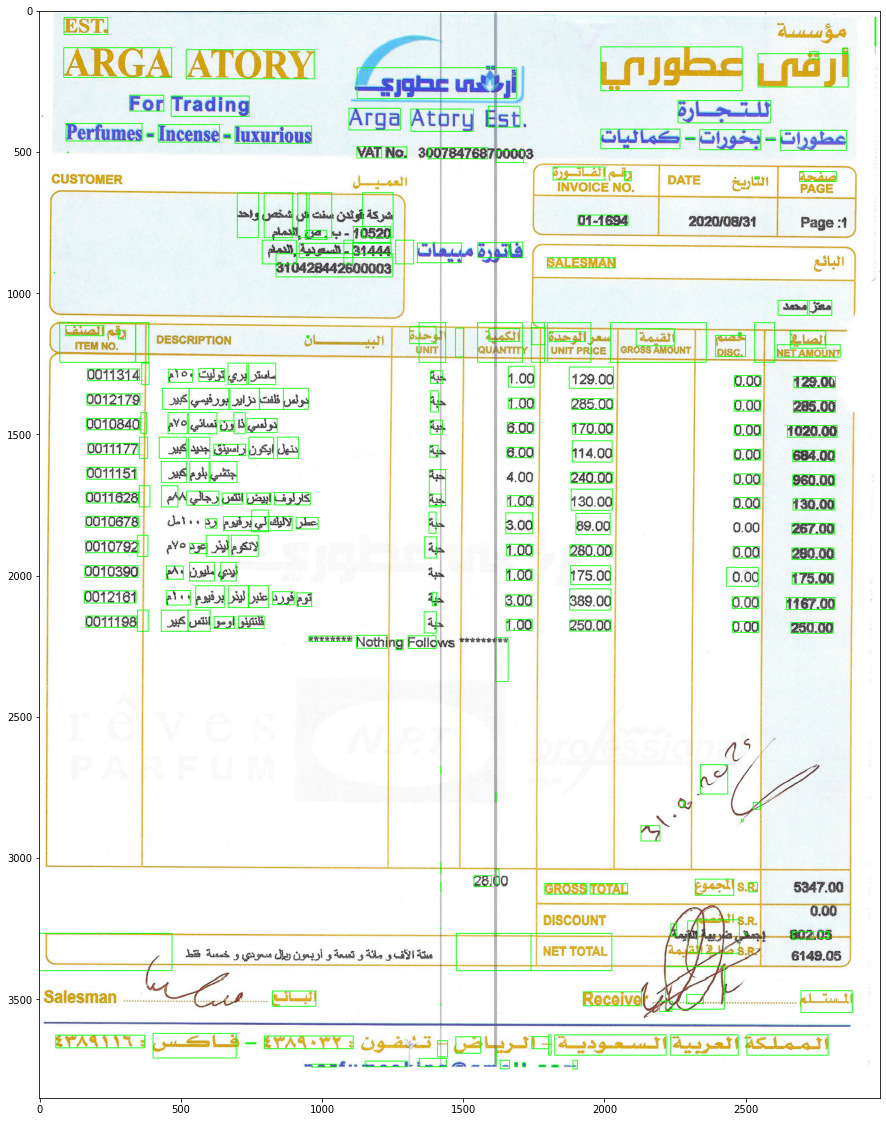

call data extract fns now
{'line_1': {'content': 'EST.', 'y_min': 26, 'y_max': 26, 'x_min': 88, 'x_max': 88}, 'line_2': {'content': 'Bee | ', 'y_min': 134, 'y_max': 147, 'x_min': 2726, 'x_max': 2842}, 'line_3': {'content': 'ARGA | ATORY | fi | عطوراي | رقى', 'y_min': 130, 'y_max': 204, 'x_min': 87, 'x_max': 2543}, 'line_4': {'content': 'For | Trading | Arga | Atbry | Est | للتجارة', 'y_min': 301, 'y_max': 350, 'x_min': 320, 'x_max': 2260}, 'line_5': {'content': 'Perfumes | Incense | luxurious | كماليات | بخورات | عطورات', 'y_min': 401, 'y_max': 425, 'x_min': 95, 'x_max': 2622}, 'line_6': {'content': 'VAT | No. | 300784768 | 0000', 'y_min': 483, 'y_max': 497, 'x_min': 1124, 'x_max': 1616}, 'line_7': {'content': 'الفاتورة | رقم | ie | صفحة', 'y_min': 555, 'y_max': 590, 'x_min': 1818, 'x_max': 2690}, 'line_8': {'content': 'ودح | شخص | شن | سنت | شركة | 01', 'y_min': 646, 'y_max': 725, 'x_min': 701, 'x_max': 1906}, 'line_9': {'content': 'it | 10520', 'y_min': 766, 'y_max': 779, 'x_min': 94

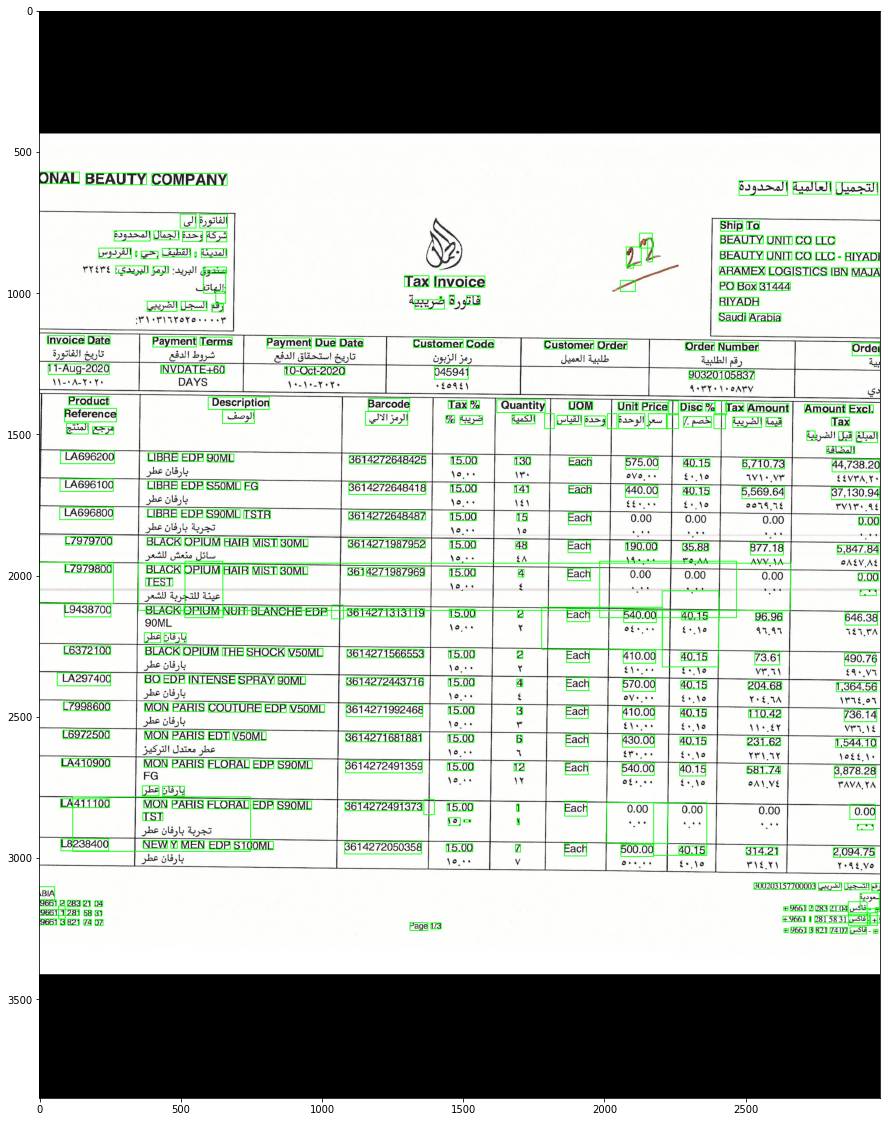

call data extract fns now
{'line_1': {'content': 'ONAL | BEAUTY | COMPANY | المحدودة | العالمية | التجميل', 'y_min': 573, 'y_max': 609, 'x_min': 0, 'x_max': 2819}, 'line_2': {'content': 'الى | الفاتورة | Ship | To', 'y_min': 722, 'y_max': 747, 'x_min': 499, 'x_max': 2502}, 'line_3': {'content': 'المحدودة | الجمال | وحدة | شركة | mW | BEAUTY | UNIT | CO | LLC', 'y_min': 781, 'y_max': 801, 'x_min': 266, 'x_max': 2748}, 'line_4': {'content': 'الفردوس | حي | القطيف | المدينة | 1 | BEAUTY | UNIT | CO | LLC | RIYADI', 'y_min': 806, 'y_max': 858, 'x_min': 211, 'x_max': 2852}, 'line_5': {'content': 'الريدى | الرم | صدهة | ARAMEX | LOGISTICS | IBN | MAJA', 'y_min': 905, 'y_max': 913, 'x_min': 271, 'x_max': 2875}, 'line_6': {'content': 'my | Tax | Invoice | ee | PO | Box | 31444', 'y_min': 920, 'y_max': 964, 'x_min': 582, 'x_max': 2549}, 'line_7': {'content': 'خب | فاته | RIYADH', 'y_min': 1010, 'y_max': 1017, 'x_min': 1417, 'x_max': 2407}, 'line_8': {'content': 'الضريجي | السجل | رقم | نهد | Sa

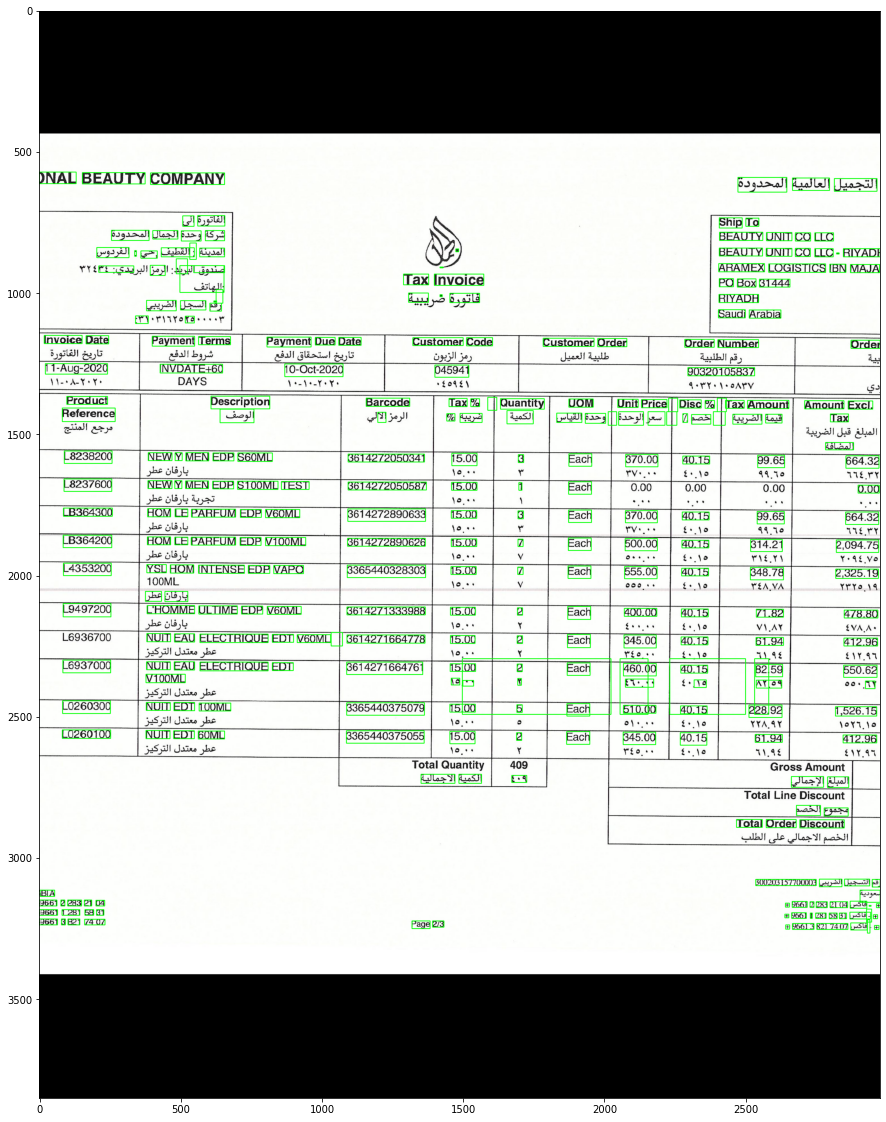

call data extract fns now
{'line_1': {'content': 'JNAL | BEAUTY | COMPANY | المحدودة | العالمية | التجميل', 'y_min': 573, 'y_max': 596, 'x_min': 0, 'x_max': 2813}, 'line_2': {'content': 'الى | الفاتورة | Ship | To', 'y_min': 727, 'y_max': 736, 'x_min': 508, 'x_max': 2500}, 'line_3': {'content': 'المحدودة | الجمال | وحدة | شركة | BEAUTY | UNIT | CO | LLC', 'y_min': 779, 'y_max': 788, 'x_min': 256, 'x_max': 2744}, 'line_4': {'content': 'الفردوس | حي | القطيف | المدينة | BEAUTY | UNIT | CO | LLC | RIYADI', 'y_min': 840, 'y_max': 852, 'x_min': 204, 'x_max': 2845}, 'line_5': {'content': 'ee | ee | ee | ARAMEX | LOGISTICS | IBN | MAJA', 'y_min': 880, 'y_max': 905, 'x_min': 211, 'x_max': 2870}, 'line_6': {'content': 'ae | Tax | Invoice | PO | Box | 31444', 'y_min': 903, 'y_max': 952, 'x_min': 393, 'x_max': 2548}, 'line_7': {'content': 'dary | nd | 849318 | RIYADH', 'y_min': 1001, 'y_max': 1007, 'x_min': 1307, 'x_max': 2405}, 'line_8': {'content': 'الضريبي | السجل | رقم | Saudi | Arabia', 'y_m

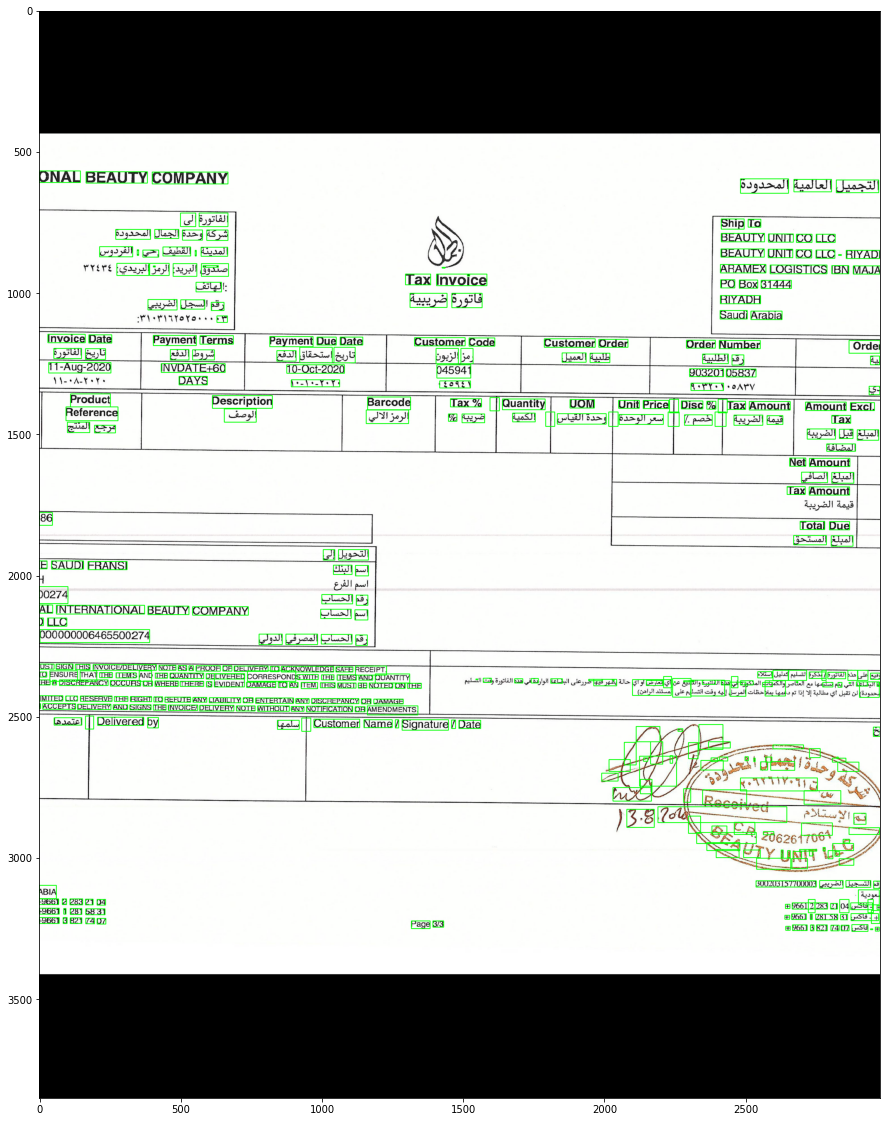

call data extract fns now
{'line_1': {'content': 'ONAL | BEAUTY | COMPANY | المحدودة | العالمية | التجميل', 'y_min': 569, 'y_max': 601, 'x_min': 0, 'x_max': 2820}, 'line_2': {'content': 'الى | الفاتورة | Ship | To', 'y_min': 718, 'y_max': 740, 'x_min': 500, 'x_max': 2508}, 'line_3': {'content': 'المحدودة | الجمال | وحدة | شركة | BEAUTY | UNIT | CO | LLC', 'y_min': 776, 'y_max': 793, 'x_min': 271, 'x_max': 2749}, 'line_4': {'content': 'الفردوس | حي | القطيف | المدينة | BEAUTY | UNIT | CO | LLC | RIYADI', 'y_min': 837, 'y_max': 850, 'x_min': 214, 'x_max': 2855}, 'line_5': {'content': 'ARAMEX | LOGISTICS | IBN | MAJA', 'y_min': 900, 'y_max': 905, 'x_min': 2410, 'x_max': 2880}, 'line_6': {'content': 'البريدي | الرمز | البريد | صندوق', 'y_min': 896, 'y_max': 897, 'x_min': 275, 'x_max': 574}, 'line_7': {'content': 'igi | Tax | Invoice | PO | Box | 31444', 'y_min': 934, 'y_max': 963, 'x_min': 555, 'x_max': 2554}, 'line_8': {'content': 'ضريبية | فاتورة | RIYADH', 'y_min': 1002, 'y_max': 1010, 

In [12]:
# for  objs in  s3Objs:
for  objs in s3Objs:
        path = os.path.abspath(os.getcwd())
        filename= objs.split('/')[-1]
        downloadfile_directory = os.path.join(os.getcwd(), r'pdfs')
        if not os.path.exists(downloadfile_directory):
            os.makedirs(downloadfile_directory) 
        downloadfilepath = f'{downloadfile_directory}/{filename}'
        #print(filename)
        #print(downloadfilepath)
        s3.Bucket(s3bucket).download_file(Key=objs,Filename=downloadfilepath)
        createJsonData(downloadfilepath, filename)

## Create the json element for pdf data 

In [3]:
def publish_processed_output(outfilename, dct, img):
    with open(outfilename, 'a') as outfile:
        outfile.write('\n')
        outfile.write(img+ '\n')
        outfile.write('--------------------- \n')
        outfile.write('\n')
        for hostDict in dct:
            json.dump(hostDict, outfile, ensure_ascii=False)
            outfile.write(' : ')
            json.dump(dct[hostDict], outfile, ensure_ascii=False)
            outfile.write('\n')


def createJsonData(filepath, filename):
    pdfs = filepath
    pages = convert_from_path(pdfs, 350)
    jsonfiledata = filename.split('.')[0]
    i = 1
    ## PDF Image Json Content Extract ## 
    pdfData = {}
    pdfData['pdf_file_id'] = jsonfiledata
    pdfData['content'] = {}

    output_publish_file = f'{jsonfiledata.replace(" ", "_")}_extracted_data.txt'
    current_directory = os.getcwd()
    publish_directory = os.path.join(current_directory, r'extracted_data')
    if not os.path.exists(publish_directory):
        os.makedirs(publish_directory) 
    output_publish_file =  publish_directory + '/' + output_publish_file    
    with open(output_publish_file, 'w') as outfile:
        outfile.write('\n')
    outfile.close()

    global pdf_imgs
    pdf_imgs = []
    for page in pages:
        image_name = "Page_" + str(i) + ".jpg"  
        page.save(image_name, "JPEG")
        pdf_imgs.append(image_name)
        i = i+1 
    print(pdf_imgs)

    pdfData['content'] = []
    
    for imgs in pdf_imgs:   
        createdict = {}
        createdict[imgs.split('.')[0]] = {}
        pdfData['content'].append(createdict)
        #pdfData['content']['page'][imgs.split('.')[0]] = {} 
        #pdfData[jsonfiledata]['page'][imgs] = {}
        ImageProcessor = ImageProcessingModel(imgs)
        print('call data extract fns now')
        sorteddict = ImageProcessor.model_dataextract()
        print(sorteddict)
        ## print the extracted content to a text file for now 
        print('publishing content')
        publish_processed_output(output_publish_file, sorteddict, imgs.split('.')[0])
    print(pdfData)
    


## Image Preprocessing before feeding to OCR model, OCR model added

In [9]:
class ImageProcessingModel():
    
    def __init__(self, OrgImg):
        print('----------------------------')
        print('Processing Object Initiated')
        print('----------------------------')
        print(f'Image being processed : {OrgImg}')
        self.img_cv = cv2.imread(OrgImg)
        self.img_processed = self.processPDFImages(OrgImg)
        cv2.imwrite('inv_img.png',self.img_processed) ## save the processed img with openCV
        self.PIL_img_org = Image.open(OrgImg)
        self.PIL_img_processed = Image.open('inv_img.png')
        
        ## fix image orientation 
        self.fixImageOrientation(OrgImg)
        self.model_confidence = 20
        self.box_hor_orientation_priority = 1 ## setting left to right for horizontal priority for extracting data in boxes
        self.box_ver_orientation_priority = 1 ## setting top to bottom for vertical priority for extracting data in boxes 
        self.OCR_textDetection_model(OrgImg)
        ## pass image to OCR Model for text detection
        
        
        ##check all different Images now
        # plt.figure(figsize=(10,10))
        # plt.imshow(self.img_cv,cmap='gray')
        # plt.show()

        # plt.imshow(self.img_processed,cmap='gray')
        # plt.show()

        # plt.imshow(self.PIL_img_processed,cmap='gray')
        # plt.show()
    
    # get grayscale image
    def get_grayscale(self,image):
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # noise removal
    def remove_noise(self,image):
        return cv2.medianBlur(image,5)

    def get_imgblurred(self,image):
        return cv2.GaussianBlur(image, (3,3), 0)

    #thresholding
    def thresholding(self,image):
        return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
        # cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    #dilation
    def dilate(self,image):
        kernel = np.ones((5,5),np.uint8)
        return cv2.dilate(image, kernel, iterations = 1)
    
    #erosion
    def erode(self,image):
        kernel = np.ones((5,5),np.uint8)
        return cv2.erode(image, kernel, iterations = 1)

    #opening - erosion followed by dilation
    def opening(self,image):
        kernel = np.ones((5,5),np.uint8)
        return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    #canny edge detection
    def canny(self,image):
        return cv2.Canny(image, 100, 200)

    #skew correction
    def deskew(self,image):
        coords = np.column_stack(np.where(image > 0))
        angle = cv2.minAreaRect(coords)[-1]
        if angle < -45:
            angle = -(90 + angle)
        else:
            angle = -angle
        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
        return rotated

    #template matching
    def match_template(self,image, template):
        return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    
    ## preprocess image, before feeding to OCR Model  
    def processPDFImages(self,img):
        im = self.img_cv
        gray = self.get_grayscale(im)
        #rmnoise = remove_noise(gray)
        thresh = self.thresholding(gray)
        # blur = cv2.GaussianBlur(gray, (3,3), 0)

        # Morph open to remove noise and invert image
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
        opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
        invert = 255 - opening
        return thresh
    
    
    def fixImageOrientation(self,img): 
        #  cv2.imwrite('inv_img.png',img)
        #  inverted_image  = Image.open('inv_img.png')
        print(pytesseract.image_to_osd(self.PIL_img_processed))

        Img_orientation = int(re.search('(?<=Rotate: )\d+', pytesseract.image_to_osd(self.PIL_img_processed)).group(0)) 
        print(f'Image orientation is : {Img_orientation}')
        rotated_img = self.PIL_img_processed
        org_PIL_rotated_img = self.PIL_img_org 
        if Img_orientation > 0:
              print('Fixing Image orientation ')
              angle_to_rotate_Img = -int(re.search('(?<=Rotate: )\d+', pytesseract.image_to_osd(self.PIL_img_processed)).group(0)) 
              rotated_img    = self.PIL_img_processed.rotate(angle_to_rotate_Img)
              org_PIL_rotated_img = self.PIL_img_org.rotate(angle_to_rotate_Img) 
            
        self.org_PIL_rotated_img = org_PIL_rotated_img  ## PIL Image original fixed
        self.rotated_img = rotated_img ## PIL Image orientation fixed
        self.cv_rotated_img = cv2.cvtColor(np.array(self.org_PIL_rotated_img), cv2.COLOR_RGB2BGR) ## cv image orientation fixed 
                
        # print('image before orientation fix')
        # plt.figure(figsize=(10,10))
        # plt.imshow(self.PIL_img_processed)
        # plt.show()
        # 
        # print('image after orientation fix')
        # plt.imshow(self.cv_rotated_img)
        # plt.show()
        # 
        # print('image after orientation fix')
        # plt.imshow(self.org_PIL_rotated_img)
        # plt.show()
        
    def OCR_textDetection_model(self, img):
        ## config defined for tesseract params 
        custom_config = r'--oem 3 --psm 6' 
        ## invoke model with configs, for langs [eng,ara] included 
        d = pytesseract.image_to_data(self.org_PIL_rotated_img, output_type=pytesseract.Output.DICT, config=custom_config, lang='eng+ara')
        boxes = len(d['level'])
        for i in range(boxes):
          if int(d['conf'][i]) > 20:
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            cv2.rectangle(self.cv_rotated_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        self.img_data = d ## setting img_data for extracting in further steps
        self.boxes = boxes
        
        ### Uncomment this section to see the bounding boxes on original image, check and fine 
        ### tune the model accordingly
        
        plt.figure(figsize=(20,20))
        plt.imshow(self.cv_rotated_img)
        plt.show()
        
        ## call dataprocessing fns now ! commented and taken out to main fn caller
        # self.model_dataextract()  
        
    
    def model_dataextract(self):
        ## fetch set for lines in doc 
        lines = [l for l in self.img_data['line_num']]
        num_lines = set(lines)
        #print(num_lines)

        data_process_dict = {}
        for ln in num_lines: 
            #print('line :',ln)
            data_process_dict[f'line_{ln}'] = []
            for i in range(self.boxes):  
              if self.img_data['line_num'][i] == ln:
                    #print('-------------------------')
                    for kys in self.img_data.keys():
                      if self.box_hor_orientation_priority and self.box_ver_orientation_priority:
                         if kys=='left' and int(self.img_data['conf'][i]) > self.model_confidence and len(self.img_data['text'][i]) > 1: 
                             newDict = dict()
                             newDict['left'] = self.img_data[kys][i]
                             newDict['text'] = self.img_data['text'][i]  
                             newDict['top']  = self.img_data['top'][i]  
                             data_process_dict[f'line_{ln}'].append(newDict)
        #print('extracted data :')
        #print(data_process_dict)                     
                             
        ## now process each lines to get the texts sorted from left and get min,max values for top, to identify the 
        ## block of works in the documents, to understand how far words differ  vertically
    
        clear_sorted_dict_arr = []
        clear_sorted_dict = dict()
        for line in data_process_dict: 
          #print(line)
          if len(data_process_dict[line]) > 0:
             left_arr,text_arr,y_val_arr = [],[],[]
             for dct in data_process_dict[line]:  
                  left_arr.append(dct['left'])
                  text_arr.append(dct['text'])
                  y_val_arr.append(dct['top'])
             #print(left_arr)
             #print(text_arr)
             #print(y_val_arr)
             #print(f'y_min:{min(y_val_arr)}',f'y_max:{max(y_val_arr)}')
             #print(f'x_min:{min(left_arr)}',f'x_max:{max(left_arr)}')   
             text_sorted_arry, combined_srted_arr = self.sort_fromleft_arry(text_arr,left_arr)
             text_sorted_arry1 = [re.sub('[^a-zA-Z0-9ا-ي\n\.]','', z) for z in text_sorted_arry]   
             #print(text_sorted_arry1)
             clear_sorted_dict[line] = dict()
             #clear_sorted_dict['line']['content'] = ' | '.join(text_sorted_arry1)
             clear_sorted_dict[line]['content'] = ' | '.join(text_sorted_arry1)
             clear_sorted_dict[line]['y_min'] =  min(y_val_arr)
             clear_sorted_dict[line]['y_max'] =  max(y_val_arr)
             clear_sorted_dict[line]['x_min'] =  min(left_arr)
             clear_sorted_dict[line]['x_max'] =  max(left_arr)   
             #print('-------')
        #print('<======= processed data =======> ')        
        return clear_sorted_dict
    
    ## fn for sorting the lists based on distace from left margin
    ## required for ordering the word blocks read by model 
    def sort_fromleft_arry(self,X,Y):
            keydict = dict(zip(X, Y))
            X.sort(key=keydict.get)
            return X, keydict


        
        

In [10]:
# img_processed = processPDFImages(pdf_imgs[1])

# cv2.imshow('inverted_image', img_processed)
# # Maintain output window until user presses a key
# cv2.waitKey(0)
# # Destroying present windows on screen
# cv2.destroyAllWindows()
    
# gray = get_grayscale(img_processed)
# thresh = thresholding(gray)
# dlt = dilate(gray)
# opening = opening(gray)
# canny = canny(gray)
# rmnoise = remove_noise(gray)

In [11]:
# plt.figure(figsize=(10,10))
# plt.imshow(img_original, cmap='gray')
# plt.show()
# plt.imshow(img_processed, cmap='gray')
# plt.show()